Name: Prachi Mehta

Batch: A

UID: 2018130025

Roll No: 17

BE COMPS

In [ ]:
#importing pandas,math,numpy library
import pandas as pd
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown

In [ ]:
#Reading the csv file and storing it in dataframe
df = pd.read_csv('/content/sample_data/winequality-red.csv',encoding='latin-1')
print(df.head())

   fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5
3           11.2              0.28         0.56  ...       0.58      9.8        6
4            7.4              0.70         0.00  ...       0.56      9.4        5

[5 rows x 12 columns]


In [ ]:
# Check missing values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
bins = [2,4,6,9]
labels= ['bad','medium','good']
df['quality']=pd.cut(df['quality'],bins=bins, labels=labels)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,medium
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,medium
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,medium


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


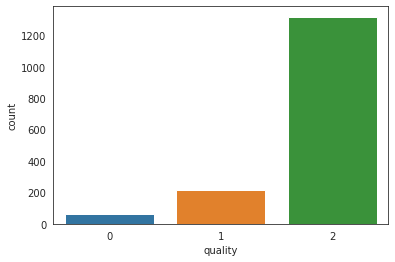

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['quality'] = le.fit_transform(df.quality)
sns.countplot(df['quality'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


This dataset only has numerical data, it doesn't contain any categorical data

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


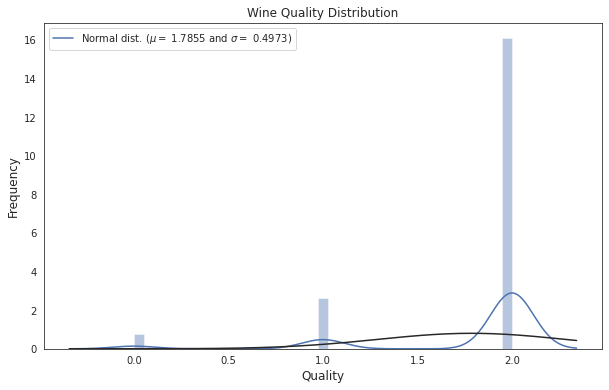

In [ ]:
from scipy.stats import norm
from scipy import stats
import seaborn as sns

# Style
sns.set_style('white')
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(10, 6))

# Distibution plot
sns.distplot(df['quality'], color='b', fit=norm)

# Mean and variance
mu, sigma = norm.fit(df['quality'])


# Plot Details
plt.legend(["Normal dist. ($\mu=$ {:.4f} and $\sigma=$ {:.4f})".format(mu, sigma)], loc='best')
ax.axes.grid(False)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Quality', fontsize=12)
plt.title('Wine Quality Distribution')

plt.show()


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,1.785491
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.497442
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,2.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,2.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,2.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,2.000000


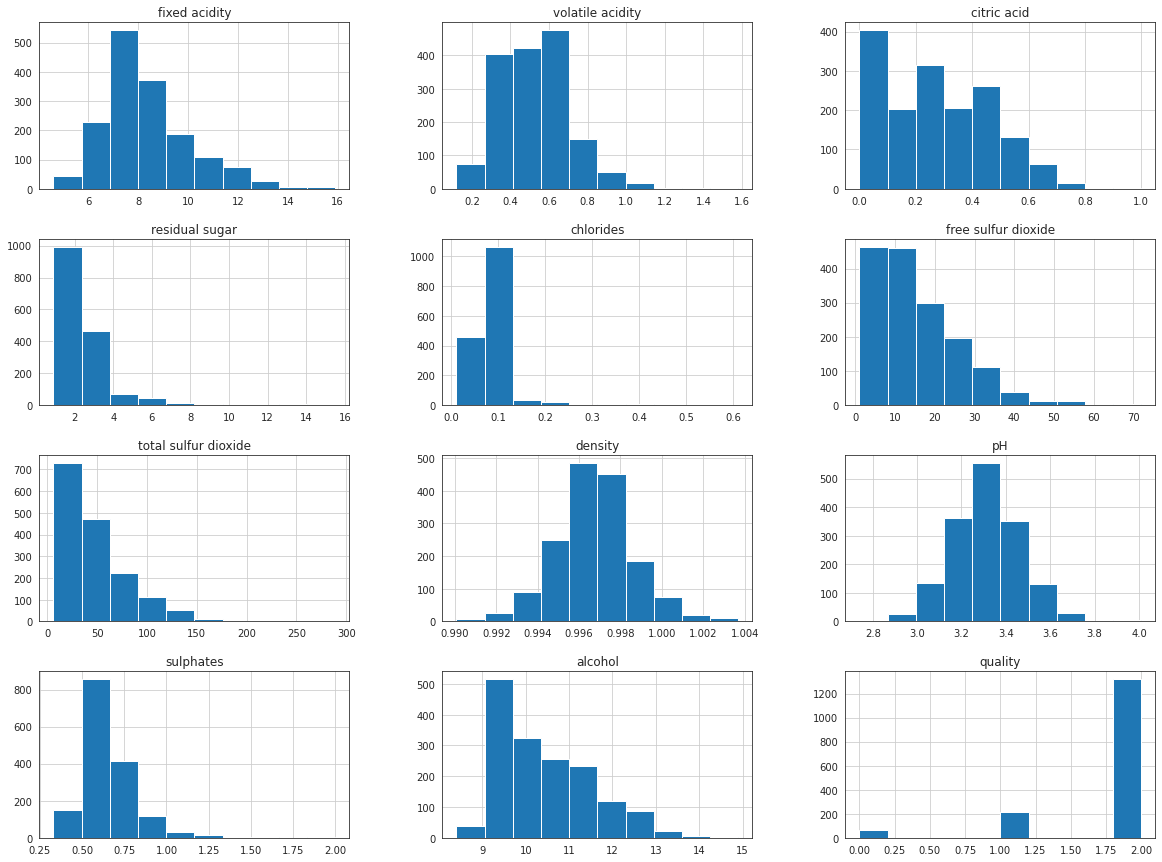

In [ ]:
df.hist(figsize=(20, 15))

plt.show()

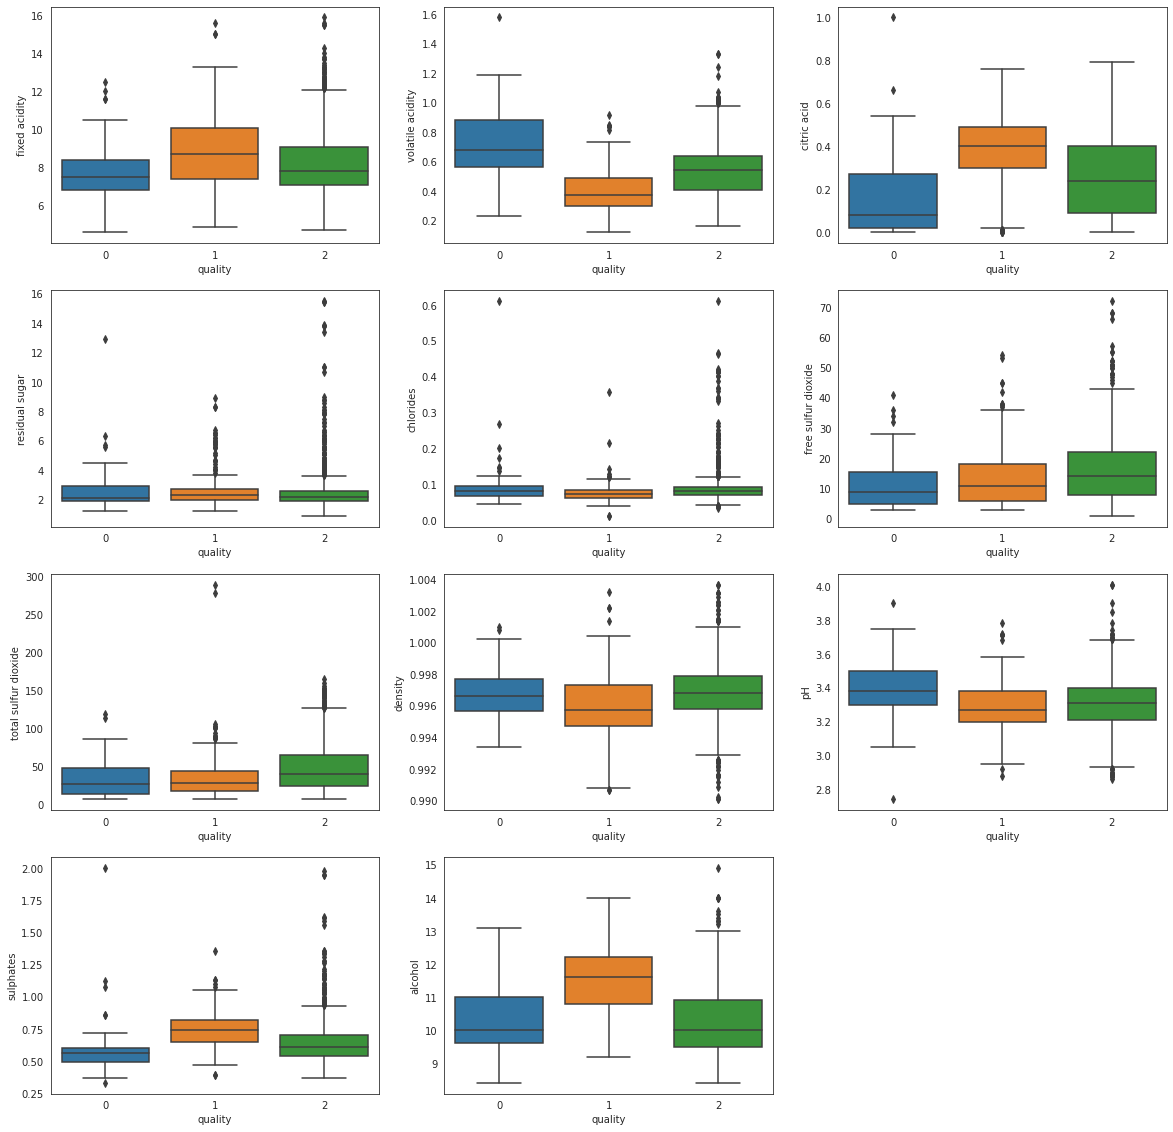

In [ ]:
plt.figure(figsize = (20,20))
for i,col in enumerate(df.drop('quality',axis =1).columns):
    plt.subplot(4,3,i+1)
    sns.boxplot(y = col, x = 'quality',data = df)
plt.show()

There are many outliers in each feature. They will be removed by IQR method in the following

In [ ]:
corr_matrix = df.corr()

# Find out which feature has the highest correlation with target
corr_matrix['quality'].sort_values(ascending=False)

quality                 1.000000
total sulfur dioxide    0.154020
density                 0.108488
free sulfur dioxide     0.107169
chlorides               0.039185
volatile acidity        0.012593
pH                     -0.035512
fixed acidity          -0.041881
residual sugar         -0.049332
citric acid            -0.068682
sulphates              -0.075736
alcohol                -0.249711
Name: quality, dtype: float64

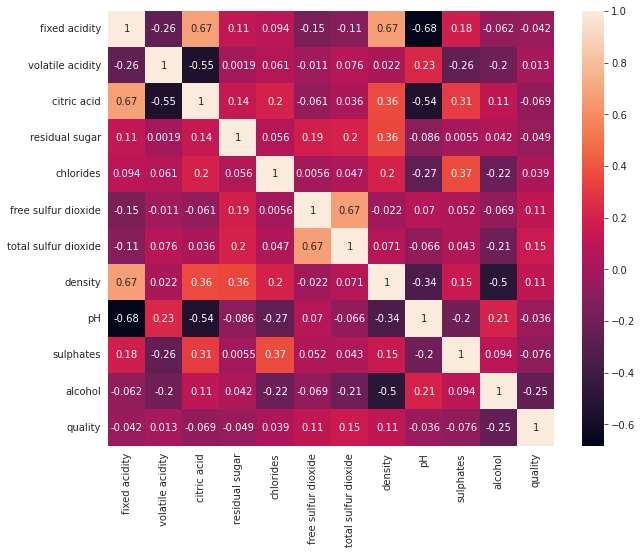

In [ ]:
plt.subplots(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True)

Features with positive correlations: total sulfur dioxide >> density  > free sulfur dioxide >> other features
Features with negative correlations: residual sugar << citric acid < sulphates << other features

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold

data = df.copy()

X = data.drop('quality', axis=1).values
y = data['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
from sklearn.linear_model import LogisticRegression # for Logistic Regression Algorithm
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score


lr = LogisticRegression()
lr.fit(X_train ,y_train)
y_pred = lr.predict(X_test)
lr.score(X_test,y_test)

0.828125

With NO Feature Engineering
Simple Logistic Regression
Only select highly correlated featuers 'total sulfur dioxide', 'density', 'free sulfur dioxide','chlorides', 'volatile acidity'

In [ ]:
X = df[['total sulfur dioxide', 'density', 'free sulfur dioxide','chlorides', 'volatile acidity']].values
y = data['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
lr = LogisticRegression()
lr.fit(X_train ,y_train)
y_pred = lr.predict(X_test)
lr.score(X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.81875

Models 1 have better performance

Remove outliers by Standard Deviation Method
First, calculate the mean and standard deviation of data field
Second, remove outliers that are lower than Mean - 3 S/D or greater than Mean + 3 S/D

In [ ]:
features = [c for c in df.columns if c != 'quality']

In [ ]:
print("Number of Tuples before removing outliers: ", len(df), "\n")

Tuples = len(df)

for feature in features:
    feature_values = df[feature].values
    mean = feature_values.mean()
    std = feature_values.std()
    lowerbound, upperbound = mean - 3*std, mean + 3*std
    print("Feature: %s" % feature)
    print("Mean: {:.4f}".format(mean), "\tS.D: {:.4f}".format(std))
    print("Lower bound: {:.4f}".format(lowerbound), "\tUpper bound: {:.4f}".format(upperbound))
    outliers = [x for x in feature_values if (x < lowerbound or x > upperbound)]
    print("Outliers: ", outliers)
    print("Remove {} outliers".format(len(outliers)))
    df = df.drop(df[(df[feature]<lowerbound)|(df[feature]>upperbound)].index)
    print("Tuples left: {}".format(len(df)))
    print("\n")

Number of Tuples before removing outliers:  1599 

Feature: fixed acidity
Mean: 8.3196 	S.D: 1.7406
Lower bound: 3.0980 	Upper bound: 13.5413
Outliers:  [15.0, 15.0, 13.8, 14.0, 13.7, 13.7, 15.6, 14.3, 15.5, 15.5, 15.6, 15.9]
Remove 12 outliers
Tuples left: 1587


Feature: volatile acidity
Mean: 0.5284 	S.D: 0.1790
Lower bound: -0.0086 	Upper bound: 1.0654
Outliers:  [1.13, 1.07, 1.33, 1.33, 1.09, 1.24, 1.185, 1.115, 1.58, 1.18]
Remove 10 outliers
Tuples left: 1577


Feature: citric acid
Mean: 0.2697 	S.D: 0.1930
Lower bound: -0.3095 	Upper bound: 0.8488
Outliers:  [1.0]
Remove 1 outliers
Tuples left: 1576


Feature: residual sugar
Mean: 2.5326 	S.D: 1.4096
Lower bound: -1.6962 	Upper bound: 6.7614
Outliers:  [10.7, 7.3, 7.2, 7.0, 11.0, 11.0, 7.9, 7.9, 15.5, 8.3, 7.9, 8.6, 9.0, 8.8, 8.8, 8.9, 8.1, 8.1, 8.3, 8.3, 7.8, 12.9, 13.4, 15.4, 15.4, 13.8, 13.8, 13.9, 7.8]
Remove 29 outliers
Tuples left: 1547


Feature: chlorides
Mean: 0.0868 	S.D: 0.0453
Lower bound: -0.0491 	Upper bound: 0.222

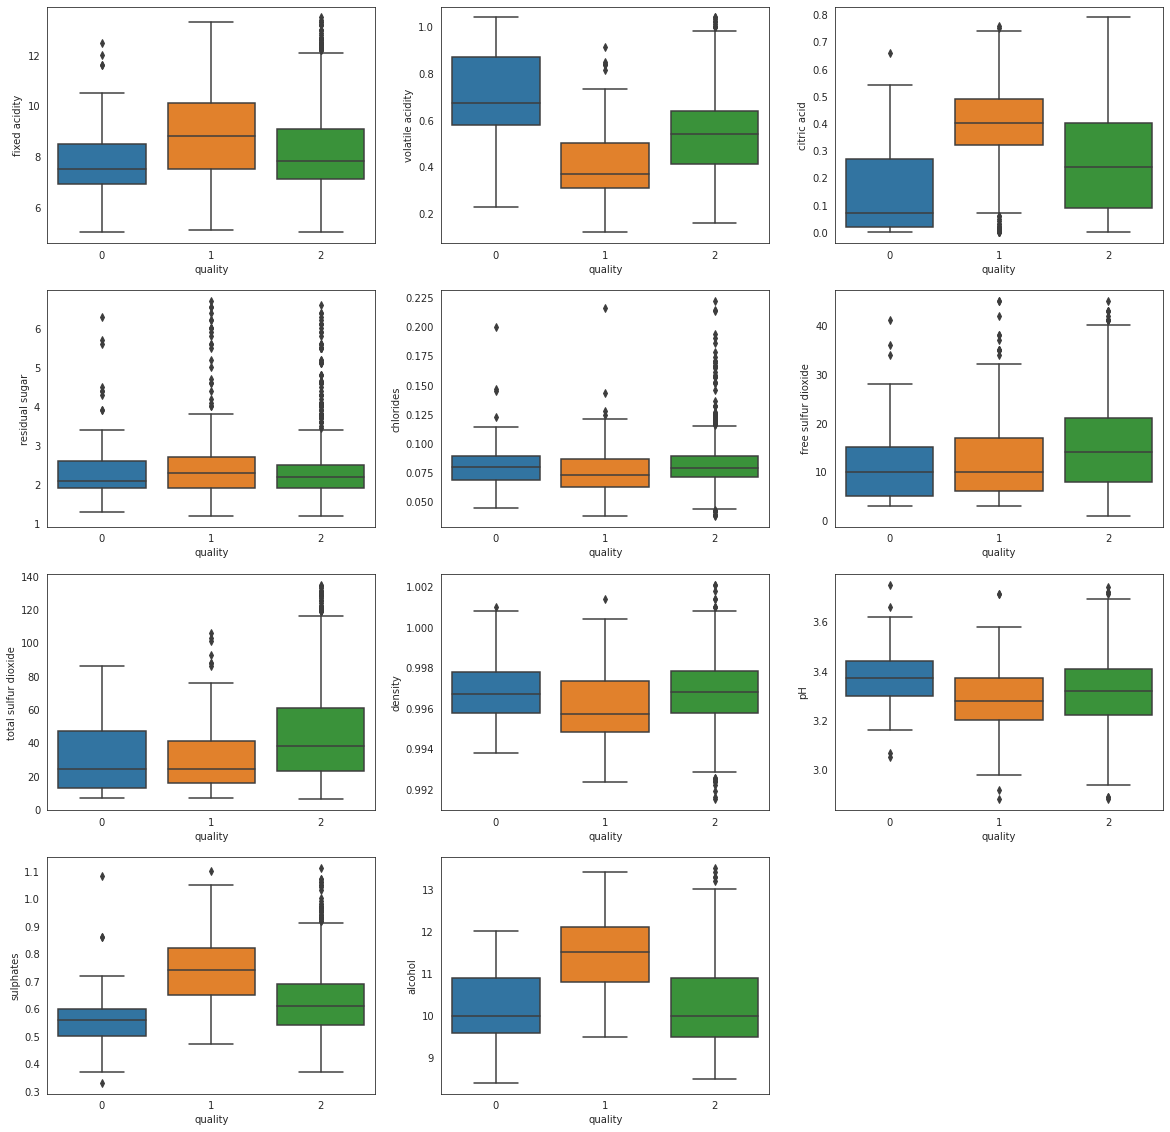

In [ ]:
plt.figure(figsize = (20,20))
for i,col in enumerate(df.drop('quality',axis =1).columns):
    plt.subplot(4,3,i+1)
    sns.boxplot(y = col, x = 'quality',data = df)
plt.show()

In [ ]:
X = df.drop('quality', axis=1).values
y = df['quality']

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X=X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

In [ ]:
lr = LogisticRegression()
lr.fit(X_train ,y_train)
y_pred = lr.predict(X_test)
lr.score(X_test,y_test)

0.8257839721254355

In [ ]:
X = df.drop('quality', axis=1).values
y = df['quality']

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) 

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()   
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test) 

In [ ]:
mean_vec=np.mean(X_train,axis=0)
cov_mat=(X_train-mean_vec).T.dot((X_train-mean_vec))/(X_train.shape[0]-1)
mean_vect=np.mean(X_test,axis=0)
cov_matt=(X_test-mean_vec).T.dot((X_test-mean_vec))/(X_test.shape[0]-1)
print(cov_mat)

[[ 1.00087489e+00 -3.10750153e-01  7.13247768e-01  1.96686853e-01
   1.95633242e-01 -1.40789732e-01 -1.05336724e-01  6.59451214e-01
  -7.05549293e-01  2.03874073e-01  1.57133481e-02]
 [-3.10750153e-01  1.00087489e+00 -5.91877534e-01  6.35056375e-04
   6.85641223e-02  2.31794142e-03  1.07725134e-01 -1.28875719e-02
   2.61874024e-01 -3.53443047e-01 -2.26644249e-01]
 [ 7.13247768e-01 -5.91877534e-01  1.00087489e+00  2.08323286e-01
   1.11616584e-01 -7.22143195e-02 -3.20024347e-03  3.80957962e-01
  -5.16549961e-01  3.13414849e-01  1.95528238e-01]
 [ 1.96686853e-01  6.35056375e-04  2.08323286e-01  1.00087489e+00
   1.34970703e-01  6.76698664e-03  1.02229563e-01  3.40397453e-01
  -9.88862819e-02  8.55014516e-02  1.89786146e-01]
 [ 1.95633242e-01  6.85641223e-02  1.11616584e-01  1.34970703e-01
   1.00087489e+00 -2.45704499e-02  7.41009980e-02  3.30207242e-01
  -1.86923537e-01 -2.53353300e-03 -1.92434211e-01]
 [-1.40789732e-01  2.31794142e-03 -7.22143195e-02  6.76698664e-03
  -2.45704499e-02  

In [ ]:
cov_mat=np.cov(X_train.T)
eig_vals,eig_vecs=np.linalg.eig(cov_mat)
cov_matt=np.cov(X_test.T)
eig_vals,eig_vecs=np.linalg.eig(cov_mat)
print(eig_vals)
print(eig_vecs)

[3.12712792 1.97854395 1.59779238 0.06042395 1.11705954 0.18504452
 0.3305966  0.41541841 0.57049395 0.86009962 0.76702296]
[[-0.51453259  0.03931647  0.09573864  0.65821015 -0.07348426  0.26031713
  -0.16723027  0.29169399  0.28708974  0.12845451 -0.07852755]
 [ 0.29384074  0.31975216  0.27301287 -0.01041826  0.29160527 -0.34990613
   0.19326193  0.186322    0.66400134  0.10401213 -0.07430549]
 [-0.48143527 -0.12919966 -0.15576814 -0.09292891 -0.09419509 -0.6599841
   0.34598951  0.33649109 -0.17170734  0.09208098  0.05726248]
 [-0.19079759  0.09069732 -0.10807956  0.16648424  0.76909745 -0.11329329
  -0.07936294 -0.36512158 -0.24475373  0.32223652 -0.090955  ]
 [-0.16630941  0.30069731  0.166114    0.04067837  0.22342944  0.00783285
  -0.0302502   0.04171893 -0.07603681 -0.48599796  0.74703447]
 [ 0.08525212  0.30579662 -0.61718167 -0.04123566 -0.11764105 -0.25294073
  -0.62853208  0.09838387  0.14287362  0.06343714  0.09807838]
 [ 0.04083166  0.45816371 -0.50581847  0.0669109  -0.06

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)

d = np.argmax(cumsum >= 0.95) + 1

print("Original dataset dimensions: %s" % X.shape[1])
print("The optimal dimensions to reduce down to: %s" %d)


Original dataset dimensions: 11
The optimal dimensions to reduce down to: 2


In [ ]:
from sklearn.decomposition import PCA 
pca = PCA(n_components = d) 
X_train = pca.fit_transform(X_train) 
X_test = pca.transform(X_test) 
X_train.shape

(1144, 2)

In [ ]:
pca.components_

array([[ 0.51453259, -0.29384074,  0.48143527,  0.19079759,  0.16630941,
        -0.08525212, -0.04083166,  0.36978624, -0.40758566,  0.20244938,
         0.01680919],
       [-0.03931647, -0.31975216,  0.12919966, -0.09069732, -0.30069731,
        -0.30579662, -0.45816371, -0.38309037,  0.06712239,  0.23142213,
         0.52213977]])

In [ ]:
lr = LogisticRegression()
lr.fit(X_train ,y_train)
y_pred = lr.predict(X_test)
lr.score(X_test,y_test)

0.8397212543554007

In [ ]:
y_pred = lr.predict(X_test)

**Conclusion:**

1) Through this experiment I understood and used logistic regression on wine quality dataset

2) I performed dimensionality reduction using PCA and learnt the importance of it.